Prueba Final - Fundamentos de Data Science

ACTIVIDAD 1.
Determinantes del ingreso
Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo. Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.

PRELIMINARES
Este problema busca esclarecer sobre los efectos que tienen los atributos en una variable categórica. Para ello una vez que realice el analisis descriptivo comenzare con la modelación descriptiva y finalmente la modelación predictiva
Importare la tríada clásica (numpy-matplotlib-pandas), seaborn, scipy stats para simular y statsmodels para modelación.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.metrics import roc_curve
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [4]:
#importe la base de datos con pandas
df=pd.read_csv('income-db.csv')

In [5]:
#transforme los valores perdidos que estaban contenidos en la base de datos como ? 
df [df == '?'] = np.nan 
#elimine los datos perdidos con dropna
df = df.dropna() 
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
#Recodifique las variables con los comandos replace y np.where según lo pedido por la consigna
df['occupation'].replace(['Prof-specialty','Exec-managerial', 'Adm-clerical', 'Sales', 'Tech-support'],'white-collar',inplace=True)      
df['occupation'].replace(['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv'],'blue-collar',inplace=True)     
df['occupation'].replace(['Other-service', 'Armed-Forces'],'others',inplace=True)
df['workclass'].replace(['Federal-gov'],'federal-gov',inplace=True) 
df['workclass'].replace(['State-gov', 'Local-gov'],'state-level-gov',inplace=True) 
df['workclass'].replace(['Self-emp-inc', 'Self-emp-not-inc'],'self-employed',inplace=True)
df['workclass'].replace(['Never-worked', 'Without-pay'],'unemployed',inplace=True)
df['education'].replace(['Preschool'],'preschool',inplace=True)
df['education'].replace(['1st-4th', '5th-6th'],'elementary-school',inplace=True)
df['education'].replace(['7th-8th', '9th', '10th','11th', '12th', 'HS-grad'],'college',inplace=True)
df['marital-status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],'married',inplace=True)
df['marital-status'].replace(['Divorced'],'divorced',inplace=True)
df['marital-status'].replace(['Separated'],'separated',inplace=True)
df['marital-status'].replace(['Widowed'],'widowed',inplace=True)
df['native-country'].replace(['Peru','Ecuador','Mexico','Guatemala','Dominican-Republic','Haiti','El-Salvador','Cuba','Nicaragua','Trinadad&Tobago','Jamaica','Honduras'],'LATAM',inplace=True)
df['native-country'].replace(['United-States','Puerto-Rico','Canada','Outlying-US(Guam-USVI-etc)'],'NORTAM',inplace=True)
df['native-country'].replace(['Ireland','Germany','Poland','England','Italy','Portugal','Scotland','Hungary','Greece','Holand-Netherlands','France','Yugoslavia','Columbia'],'EUROPE',inplace=True)
df['native-country'].replace(['Philippines','Thailand','Vietnam','South','Japan','India','Cambodia','Laos','Taiwan','China','Iran','Hong'],'ASIA',inplace=True)
df['income']=np.where(df['income']=='>50K',1,0) 

In [7]:
#Renombre las columnas con rename
df =df.rename(columns={'occupation': 'collars', 'workclass': 'workclass_recod','education':'edurecod','marital-status':'civstatus','native-country':'region','capital-gain':'capitalgain','capital-loss':'capitalloss','hours-per-week':'hoursperweek'})

In [8]:
df

,age,workclass_recod,fnlwgt,edurecod,educational-num,civstatus,collars,relationship,race,gender,capitalgain,capitalloss,hoursperweek,region,income
0,25,Private,226802,college,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,NORTAM,0
1,38,Private,89814,college,9,married,blue-collar,Husband,White,Male,0,0,50,NORTAM,0
2,28,state-level-gov,336951,Assoc-acdm,12,married,blue-collar,Husband,White,Male,0,0,40,NORTAM,1
3,44,Private,160323,Some-college,10,married,blue-collar,Husband,Black,Male,7688,0,40,NORTAM,1
5,34,Private,198693,college,6,Never-married,others,Not-in-family,White,Male,0,0,30,NORTAM,0
7,63,self-employed,104626,Prof-school,15,married,white-collar,Husband,White,Male,3103,0,32,NORTAM,1
8,24,Private,369667,Some-college,10,Never-married,others,Unmarried,White,Female,0,0,40,NORTAM,0
9,55,Private,104996,college,4,married,blue-collar,Husband,White,Male,0,0,10,NORTAM,0
10,65,Private,184454,college,9,married,blue-collar,Husband,White,Male,6418,0,40,NORTAM,1
11,36,federal-gov,212465,Bachelors,13,married,white-collar,Husband,White,Male,0,0,40,NORTAM,0


DESCRIPCIÓN

A continuación realizare un análisis exploratorio de los datos.

La base de datos se compone de 45222 observaciones y 15 columnas.

In [9]:
#Utilizare shape para extraer la cantidad de observaciones y las columnas
print("La base de datos tiene ", df.shape[0], "observaciones y ", df.shape[1], " columnas")
#Con .columns puedo saber los nombres de las columnas.
print("Las variables de la base de datos son ", df.columns)

La base de datos tiene  45222 observaciones y  15  columnas
Las variables de la base de datos son  Index(['age', 'workclass_recod', 'fnlwgt', 'edurecod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender', 'capitalgain',
       'capitalloss', 'hoursperweek', 'region', 'income'],
      dtype='object')


- Buscare las medidas descriptivas de las variables mediante describe() y value_counts(). Utilizare describe para las variables discretas y value_counts para las variables categóricas.

In [10]:
df.describe()

,age,fnlwgt,educational-num,capitalgain,capitalloss,hoursperweek,income
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017,0.247844
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508,0.431766
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [11]:
df['workclass_recod'].value_counts()

Private            33307
self-employed       5442
state-level-gov     5046
federal-gov         1406
unemployed            21
Name: workclass_recod, dtype: int64

In [12]:
df['edurecod'].value_counts()

college              19701
Some-college          9899
Bachelors             7570
Masters               2514
Assoc-voc             1959
Assoc-acdm            1507
Prof-school            785
elementary-school      671
Doctorate              544
preschool               72
Name: edurecod, dtype: int64

In [13]:
df['civstatus'].value_counts()

married          21639
Never-married    14598
divorced          6297
separated         1411
widowed           1277
Name: civstatus, dtype: int64

In [14]:
df['collars'].value_counts()

white-collar    24360
blue-collar     16040
others           4822
Name: collars, dtype: int64

In [15]:
df['race'].value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [16]:
df['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [17]:
df['region'].value_counts()

NORTAM    41652
LATAM      1719
ASIA       1031
EUROPE      820
Name: region, dtype: int64

- A partir de ese primer análisis descriptivo intentare graficar las variables para poder visualizar sus características. Las variables discretas mediante histogramas(seaborn, distplot) y las variables categóricas mediante gráficos de barras, (seaborn, countplot) y que además las vinculare con la variable objetivo que es 'income'.

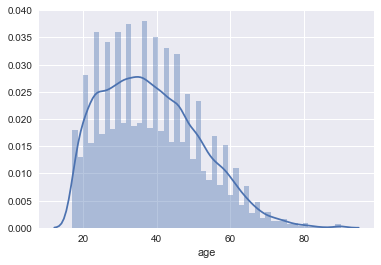

In [18]:
sns.distplot(df['age'])

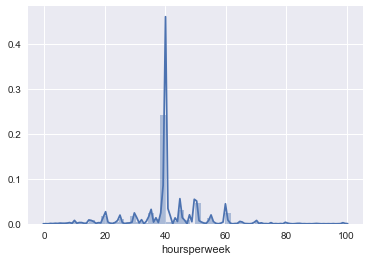

In [19]:
sns.distplot(df['hoursperweek'])

Text(0.5,1,'Cantidad de registros por ingresos')

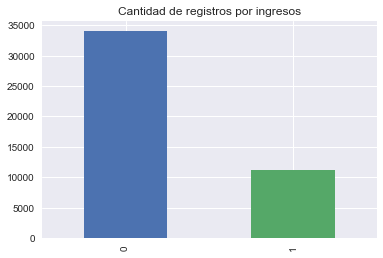

In [20]:
df['income'].value_counts().plot(kind='bar').set_title('Cantidad de registros por ingresos')

Text(0.5,1,'Ingresos en relación a la región')

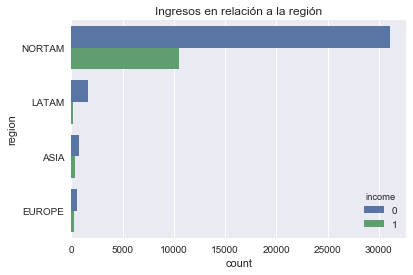

In [43]:
sns.countplot(y = df['region'], hue=df['income'],
              order = df['region'].value_counts().index).set_title('Ingresos en relación a la región')

Text(0.5,1,'Ingresos en relación al sector laboral')

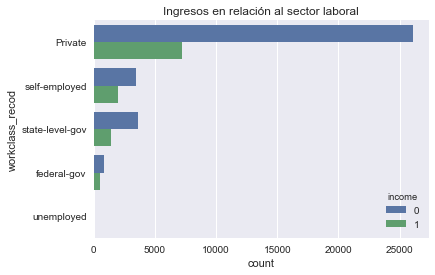

In [44]:
sns.countplot(y = df['workclass_recod'], hue=df['income'],
              order = df['workclass_recod'].value_counts().index).set_title('Ingresos en relación al sector laboral')

Text(0.5,1,'Ingresos en relación al estado civil')

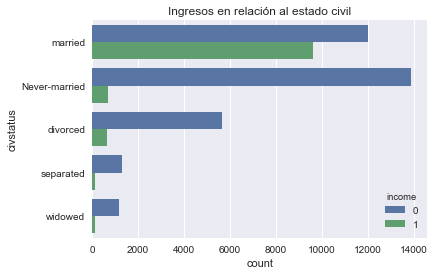

In [45]:
sns.countplot(y = df['civstatus'], hue=df['income'],
              order = df['civstatus'].value_counts().index).set_title('Ingresos en relación al estado civil')

Text(0.5,1,'Ingresos en relación al tipo de trabajo')

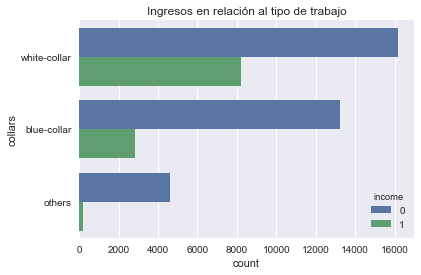

In [46]:
sns.countplot(y = df['collars'], hue=df['income'],
              order = df['collars'].value_counts().index).set_title('Ingresos en relación al tipo de trabajo')

Text(0.5,1,'Ingresos en relación al nivel educativo')

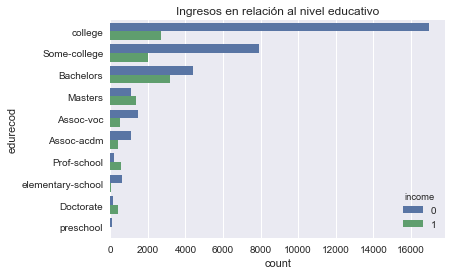

In [48]:
sns.countplot(y = df['edurecod'], hue=df['income'],
              order = df['edurecod'].value_counts().index).set_title('Ingresos en relación al nivel educativo')

A partir del análisis descriptivo de los datos se puede caracterizar la población de la siguiente manera: La edad de la población ronda entre los 20 y 80 años, que trabajan generalmente 40 horas por semana. Una minoria es la que percibe más de 50.000 dolares anuales, y esa minoría podría encerrarse casi en su totalidad dentro de las siguientes categorias: 'blancos, norteamericanos, casados, ejercen profesiones de la categoria 'white-collar', no son desempleados y poseen estudios superiores al nivel educativo denominado como 'elementary-school'.

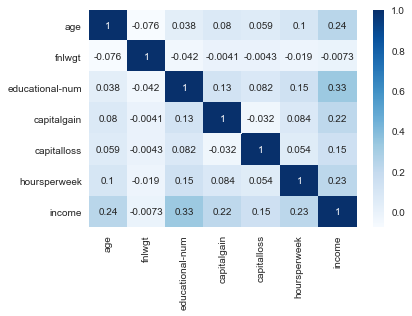

In [26]:
#Visualizare las correlaciones con el metodo heatmap de seaborn
sns.heatmap(df.corr(), cmap='Blues', annot=True);

- No se distingue asociasiones fuertes entre las variables. La correlación de pearson no tiene un buen desempeño con variables que no sean estrictamente normales, sin embargo, ésto no es un impedimiento para seguir con la modelación ya que muchas relaciones no son estrictamente lineales

MODELACIÓN DESCRIPTIVA

Implementare la regresión logística con statsmodels, este metodo requiere que la variable dependiente sea binaria y los regresores independientes pueden ser continuos y/o categóricos.

In [27]:
m1_logit = smf.logit('income ~ age + workclass_recod + edurecod + civstatus + collars + relationship + race + gender + capitalgain + capitalloss + hoursperweek + region', df).fit() 

Optimization terminated successfully.
         Current function value: 0.333657
         Iterations 11


In [28]:
print(m1_logit.summary2())

                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.404     
Dependent Variable:        income                 AIC:                    30251.3164
Date:                      2018-12-26 20:36       BIC:                    30573.9319
No. Observations:          45222                  Log-Likelihood:         -15089.   
Df Model:                  36                     LL-Null:                -25322.   
Df Residuals:              45185                  LLR p-value:            0.0000    
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            11.0000                                                  
------------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------
Intercept      

- A partir del primer método implementado con todas las variables, teniendo a income como variable dependiente. Los atributos a desestimar son: state-level-gov, unemployed, Assoc-voc, other y LATAM.
- Es así que recodificare las variables significativa que se manifestaron en el modelo de manera binaria y realizare nuevamente un modelo con ellas.

In [29]:
tmp=df

In [30]:
tmp['male']=tmp['gender'].replace(['Male','Female'],[1,0])
tmp['white_collar']=np.where(tmp['collars']=='white-collar',1,0)
tmp['others']=np.where(tmp['collars']=='others',1,0)
tmp['married']=np.where(tmp['civstatus']=='married',1,0)
tmp['widowed']=np.where(tmp['civstatus']=='widowed',1,0)
tmp['separated']=np.where(tmp['civstatus']=='separated',1,0)
tmp['divorced']=np.where(tmp['civstatus']=='divorced',1,0)
tmp['never_married']=np.where(tmp['civstatus']=='Never-married',1,0)
tmp['white_race']=np.where(tmp['race']=='White',1,0)
tmp['black_race']=np.where(tmp['race']=='Black',1,0)
tmp['asian_race']=np.where(tmp['race']=='Asian-Pac-Islander',1,0)
tmp['EUROPE']=np.where(tmp['region']=='EUROPE',1,0)
tmp['NORTAM']=np.where(tmp['region']=='NORTAM',1,0)
tmp['ASIA']=np.where(tmp['region']=='ASIA',1,0)
tmp['federal_gov']=np.where(tmp['workclass_recod']=='federal-gov',1,0)
tmp['self_employed']=np.where(tmp['workclass_recod']=='self-employed',1,0)
tmp['bachelors']=np.where(tmp['edurecod']=='Bachelors',1,0)
tmp['doctorate']=np.where(tmp['edurecod']=='Doctorate',1,0)
tmp['masters']=np.where(tmp['edurecod']=='Masters',1,0)
tmp['prof_school']=np.where(tmp['edurecod']=='Prof-school',1,0)
tmp['some_college']=np.where(tmp['edurecod']=='Some-college',1,0)
tmp['college']=np.where(tmp['edurecod']=='college',1,0)
tmp['elementary_school']=np.where(tmp['edurecod']=='elementary-school',1,0)
tmp1=pd.DataFrame({'income':tmp['income'],'black_race':tmp['black_race'],'male':tmp['male'],
                   'white_collar':tmp['white_collar'],'others':tmp['others'],'married':tmp['married'],
                   'widowed':tmp['widowed'],'separated':tmp['separated'],'divorced':tmp['divorced'],'white_race':tmp['white_race'],'asian_race':tmp['asian_race'],
     'EUROPE':tmp['EUROPE'],'NORTAM':tmp['NORTAM'],'ASIA':tmp['ASIA'],'federal_gov':tmp['federal_gov'],
      'self_employed':tmp['self_employed'],'age':tmp['age'],'capitalgain':tmp['capitalgain'],'capitalloss':tmp['capitalloss'],
     'hoursperweek':tmp['hoursperweek'],'bachelors':tmp['bachelors'],'doctorate':tmp['doctorate'],'masters':tmp['masters'],
      'prof_school':tmp['prof_school'],'some_college':tmp['some_college'],'college':tmp['college'],
    'elementary_school':tmp['elementary_school']})

tmp1

,income,black_race,male,white_collar,others,married,widowed,separated,divorced,white_race,...,capitalgain,capitalloss,hoursperweek,bachelors,doctorate,masters,prof_school,some_college,college,elementary_school
0,0,1,1,0,0,0,0,0,0,0,...,0,0,40,0,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,50,0,0,0,0,0,1,0
2,1,0,1,0,0,1,0,0,0,1,...,0,0,40,0,0,0,0,0,0,0
3,1,1,1,0,0,1,0,0,0,0,...,7688,0,40,0,0,0,0,1,0,0
5,0,0,1,0,1,0,0,0,0,1,...,0,0,30,0,0,0,0,0,1,0
7,1,0,1,1,0,1,0,0,0,1,...,3103,0,32,0,0,0,1,0,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,40,0,0,0,0,1,0,0
9,0,0,1,0,0,1,0,0,0,1,...,0,0,10,0,0,0,0,0,1,0
10,1,0,1,0,0,1,0,0,0,1,...,6418,0,40,0,0,0,0,0,1,0
11,0,0,1,1,0,1,0,0,0,1,...,0,0,40,1,0,0,0,0,0,0


In [31]:
m2_logit = smf.logit('income ~ male+white_collar+others+white_race+black_race+asian_race+NORTAM+EUROPE+married+divorced+separated+widowed+bachelors+doctorate+masters+some_college+college+prof_school+elementary_school+federal_gov+self_employed+hoursperweek+capitalloss+capitalgain+age',tmp1).fit()

Optimization terminated successfully.
         Current function value: 0.339088
         Iterations 8


In [32]:
print(m2_logit.summary2())

                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.394     
Dependent Variable:  income           AIC:              30720.5067
Date:                2018-12-26 20:36 BIC:              30947.2095
No. Observations:    45222            Log-Likelihood:   -15334.   
Df Model:            25               LL-Null:          -25322.   
Df Residuals:        45196            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -7.0020   0.1830 -38.2714 0.0000 -7.3606 -6.6435
male               0.2995   0.0418   7.1614 0.0000  0.2175  0.3815
white_collar       0.6718   0.0351  19.1225 0.0000  0.6030  0.7407
others            -0.

- Aquí en este modelo el atributo black_race no es significativa. 

In [33]:
m3_logit = smf.logit('income ~ male+white_collar+others+white_race+asian_race+NORTAM+EUROPE+married+divorced+separated+widowed+bachelors+doctorate+masters+some_college+college+prof_school+elementary_school+federal_gov+self_employed+hoursperweek+capitalloss+capitalgain+age',tmp1).fit()
print(m3_logit.summary2())

Optimization terminated successfully.
         Current function value: 0.339116
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.394     
Dependent Variable:  income           AIC:              30721.0333
Date:                2018-12-26 20:36 BIC:              30939.0167
No. Observations:    45222            Log-Likelihood:   -15336.   
Df Model:            24               LL-Null:          -25322.   
Df Residuals:        45197            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -6.8195   0.1401 -48.6868 0.0000 -7.0940 -6.5450
male               0.2985   0.0418   7.1391 0.0000  0

- Este es el modelo que elegire para hacer la modelación predictiva. Las variables significativas para describir 'income' son: male, white_collar, others, white_race, asian_race, NORTAM, EUROPE, married, divorced, separated, widowed, bachelors, doctorate, masters,some_college, college, prof_school, elementary_school, federal_gov, self_employed, hoursperweek, capitalloss, capitalgain, age. 

MODELACIÓN PREDICTIVA

El objetivo de la clasificación es enseñarle a la máquina a discriminar entre un número finito de clases en base a una serie de atributos. Para aproximarnos a este problema diseñamos una serie de aproximaciones funcionales candidatas para facilitar la discriminación entre las clases.
El objetivo es realizar predicciones en nuevas observaciones en base a la función candidata que presente el mejor desempeño predictivo. Mientras que en los problemas de regresión el desempeño se medía mediante la reducción del error cuadrático, en la clasificación se busca aumentar la tasa de clases predichas correctamente y reducir los falsos positivos (situaciones donde se clasifica de forma errónea) y falsos negativos (situaciones donde el clasificador ignora clasificaciones exitosas).

In [34]:
#Importare una serie de modulos que me permitiran realizar este modelo predictivo.
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Segmentare la base de datos en entrenamiento y validación siguiendo la nomenclatura clásica. Guardare el 33% de la muestra como validación y especificare una semilla pseudoaleatoria con random_state para asegurar replicabilidad de los resultados.

In [35]:
X_train,X_test,y_train,y_test = train_test_split(df.loc[:,'male':'elementary_school'],
                                                df['income'],
                                                test_size=.33,
                                                random_state=805)

Estandarizare cada atributo de las muestras con StandardScaler de sklearn.preprocessing. Gracias a la estandarización transformamos las variables al restarle la media y dividirla por la varianza de la variable.
Esto se realiza para homogeneizar las variables y facilitar la comparación entre atributos en el modelo logístico.
Generamos nuevos objetos llamados X_train_std y X_test_std para que guarden las nuevas matrices. Estos objetos alojarán el resultado de StandardScaler().fit_transform().

In [36]:
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

In [37]:
default_model = LogisticRegression().fit(X_train_std,y_train)
default_model.coef_

array([[ 0.24903365,  0.38254384, -0.26534224,  0.74820023, -0.03817915,
        -0.10621014, -0.16429001, -0.62501498,  0.16207106,  0.08545016,
         0.10520592,  0.11368587,  0.24990406,  0.04088916,  0.0872894 ,
        -0.01059876,  0.25209481,  0.20973097,  0.28169948,  0.26708437,
        -0.09104699, -0.34634717, -0.15282202]])

Los coeficientes del modelo son distintos a los estimados con el modelo econométrico ya que no están estandarizados

Ahora generare las predicciones en base al modelo mediante predict(X_test_std)

In [38]:
yhat = default_model.predict(X_test_std)
yhat[:20]

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [39]:
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88     11202
          1       0.68      0.52      0.59      3722

avg / total       0.81      0.82      0.81     14924



Al evaluar su desempeño obsevamos que, tiene un grado alto de precisión. La precisión mide la fracción de predicciones correctas entre las etiquetas positivas, un número alto significan que el algoritmo predice más resultados relevantes que irrelevantes. El recall también es alto, es decir que logra predecir la mayoria de los resultados relevantes.

Un buen modelo de clasificación también debe considerar cuál es el rango de errores en el modelo con el que se trabaja. Para ello utilizamos la curva ROC (Receiving Operating Characteristics), que evalúa la relación entre ambos errores condicional en todo el rango del clasificador. Para generar un gráfico de curva ROC con sklearn, utilizo el método roc_curve dentro del módulo metrics. El método devuelve tres objetos: Un array con la tasa de falsos positivos, un array con la tasa de verdaderos positivos y un array con los umbrales de decisión entre 0 y 1.

In [40]:
# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1
yhat = default_model.predict_proba(X_test)[:, 1]
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

Text(0.5,0,'Falsos Positivos')

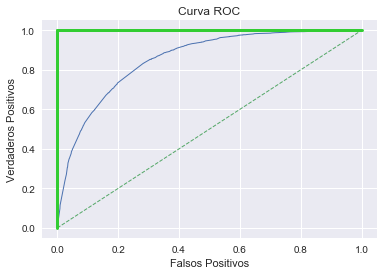

In [41]:
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')

In [42]:
from sklearn.metrics import roc_auc_score
#Para estimar el área debajo de la curva utilizamos el método roc_auc_score en el módulo metrics de sklearn
roc_auc_score(y_test, yhat)

0.8540882438184398

Apartir de estas estimaciones se puede concluir que el modelo tiene una adecuada capacidad predictiva, ya que se forma una curva sobre la bisectriz lo que significa que la tasa de verdaderos positivos es mayor que la de falsos positivos. 